In [2]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import networkx as nx
import time
import datetime
import statistics
import pandas as pd
import numpy as np

#%matplotlib notebook

In [3]:
time_between_interactions = 20 #the mininmum number of seconds between separate interactions

In [4]:
pairs_interactions = {} #key is student tuple, value is a list of list of start and end timestamps

with open("data/original/High-School_data_2013.csv", 'r') as infile:
    reader = csv.reader(infile, delimiter=" ")
    for t, id1, id2, cls1, cls2 in reader:
        t = int(t)
        id1 = int(id1); id2 = int(id2)
        
        #ts = datetime.datetime.fromtimestamp(time.mktime(time.gmtime(int(t) + 3600)))
        students = (min(id1, id2), max(id1, id2))
        
        if students in pairs_interactions:
            duration = t - pairs_interactions[students][-1][1]
            if duration <= time_between_interactions:
                pairs_interactions[students][-1][1] = t
            else:
                pairs_interactions[students].append([t - 20, t])
        else:
            pairs_interactions[students] = [[t - 20, t]]


^^ Setting up the data

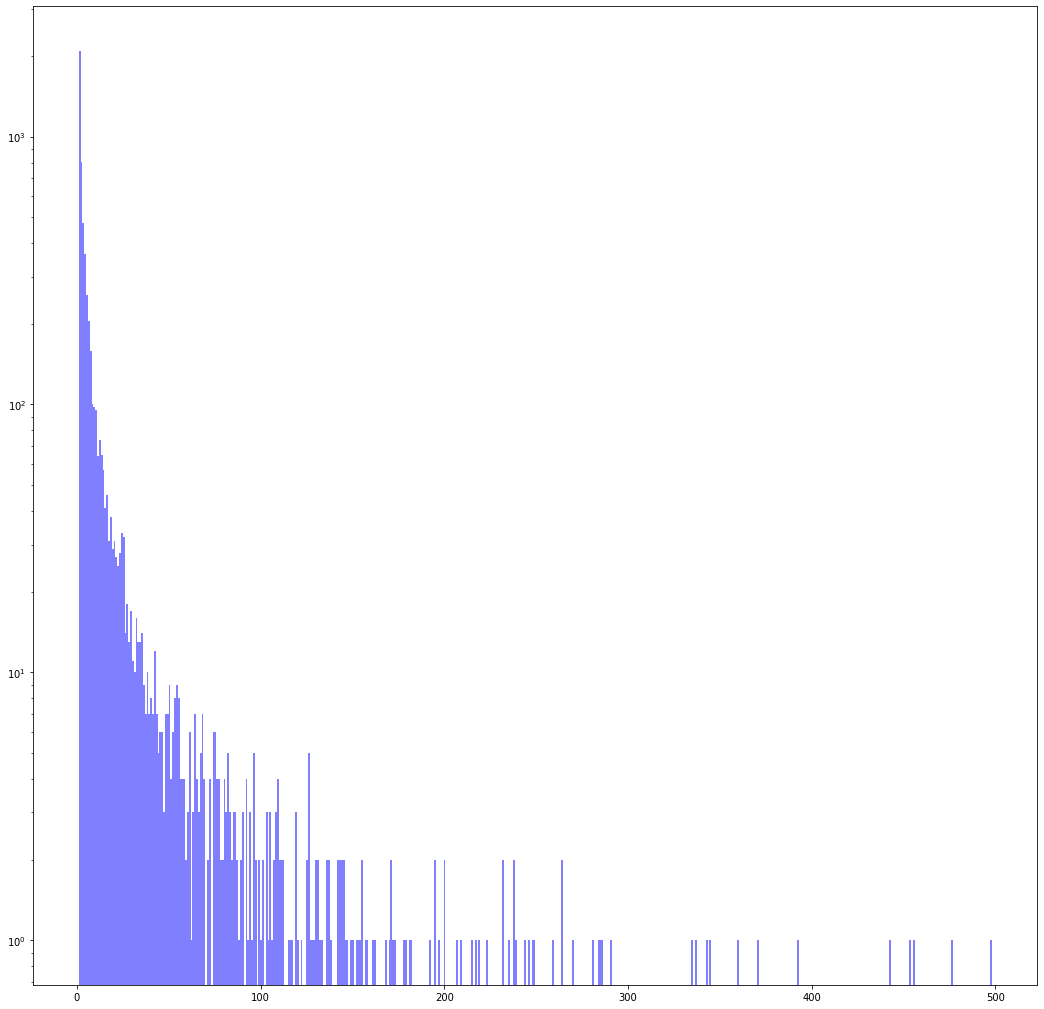

In [5]:
x1 = list(pairs_interactions.values())
x1 = [len(i) for i in x1]
num_bins1 = max(x1)

figure, axes = plt.subplots(figsize=(18,18)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(x1, num_bins1, facecolor='blue', alpha=0.5, log=True)
plt.show()

^^ Histogram of the number of interactions per pair

In [6]:
print(x1)

[67, 24, 77, 219, 144, 29, 3, 15, 443, 35, 1, 158, 85, 13, 89, 14, 105, 171, 14, 137, 34, 232, 111, 149, 132, 5, 5, 192, 171, 147, 41, 50, 138, 10, 360, 8, 200, 249, 110, 172, 248, 9, 126, 52, 18, 12, 4, 371, 29, 477, 223, 82, 7, 17, 157, 20, 238, 178, 181, 81, 12, 335, 13, 4, 2, 239, 68, 65, 11, 337, 2, 24, 8, 7, 18, 143, 19, 16, 45, 109, 15, 155, 5, 1, 2, 36, 153, 2, 2, 5, 21, 291, 16, 2, 101, 54, 209, 2, 286, 130, 20, 16, 13, 84, 8, 173, 195, 12, 23, 20, 2, 120, 3, 31, 38, 12, 1, 1, 1, 1, 50, 103, 12, 8, 22, 60, 116, 3, 12, 17, 8, 3, 69, 2, 2, 26, 28, 19, 1, 107, 32, 133, 26, 12, 15, 23, 35, 44, 29, 35, 53, 3, 3, 10, 10, 5, 29, 2, 130, 24, 3, 2, 111, 18, 12, 18, 4, 4, 18, 4, 3, 2, 3, 28, 49, 2, 8, 8, 17, 3, 24, 456, 37, 2, 19, 2, 85, 2, 84, 90, 6, 3, 33, 1, 6, 3, 8, 1, 1, 22, 9, 66, 131, 3, 4, 33, 44, 20, 58, 16, 13, 4, 9, 12, 80, 17, 17, 168, 18, 1, 5, 1, 246, 14, 2, 5, 3, 13, 7, 2, 107, 55, 3, 4, 2, 74, 2, 1, 4, 30, 1, 22, 4, 7, 6, 2, 154, 1, 1, 11, 48, 54, 7, 7, 23, 1, 1, 8, 21, 

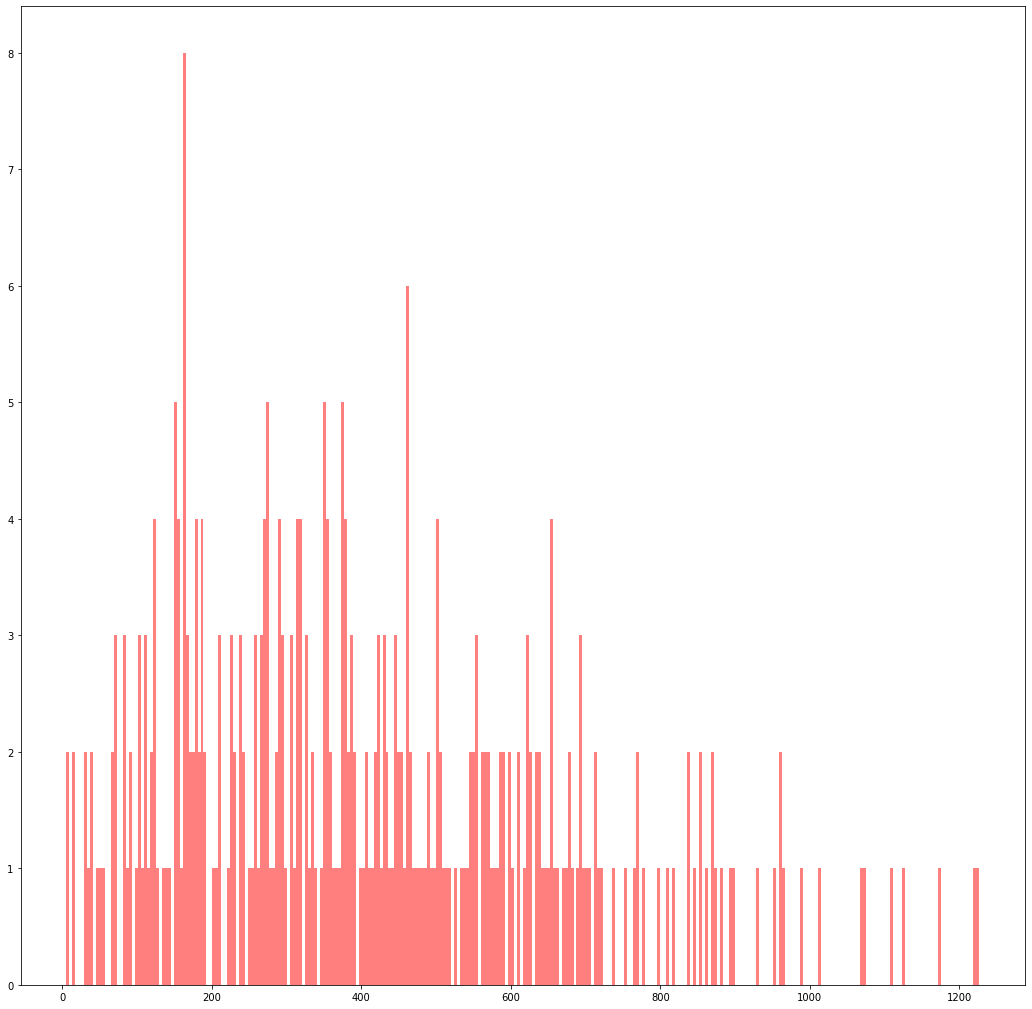

In [34]:
person_interactions = {} #key is student, value is total number of interactions they had with anyone
for pair in pairs_interactions:
    interactions = len(pairs_interactions[pair])
    for person in pair:
        if person in person_interactions:
            person_interactions[person] += interactions
        else:
            person_interactions[person] = interactions
            
x2 = list(person_interactions.values())
num_bins2 = int(max(x2) * .25)
figure, axes = plt.subplots(figsize=(18,18)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(x2, num_bins2, facecolor='red', alpha=0.5)
plt.show()

^^ Histogram of the number of interactions per one person.  x is interactions, y is number of people

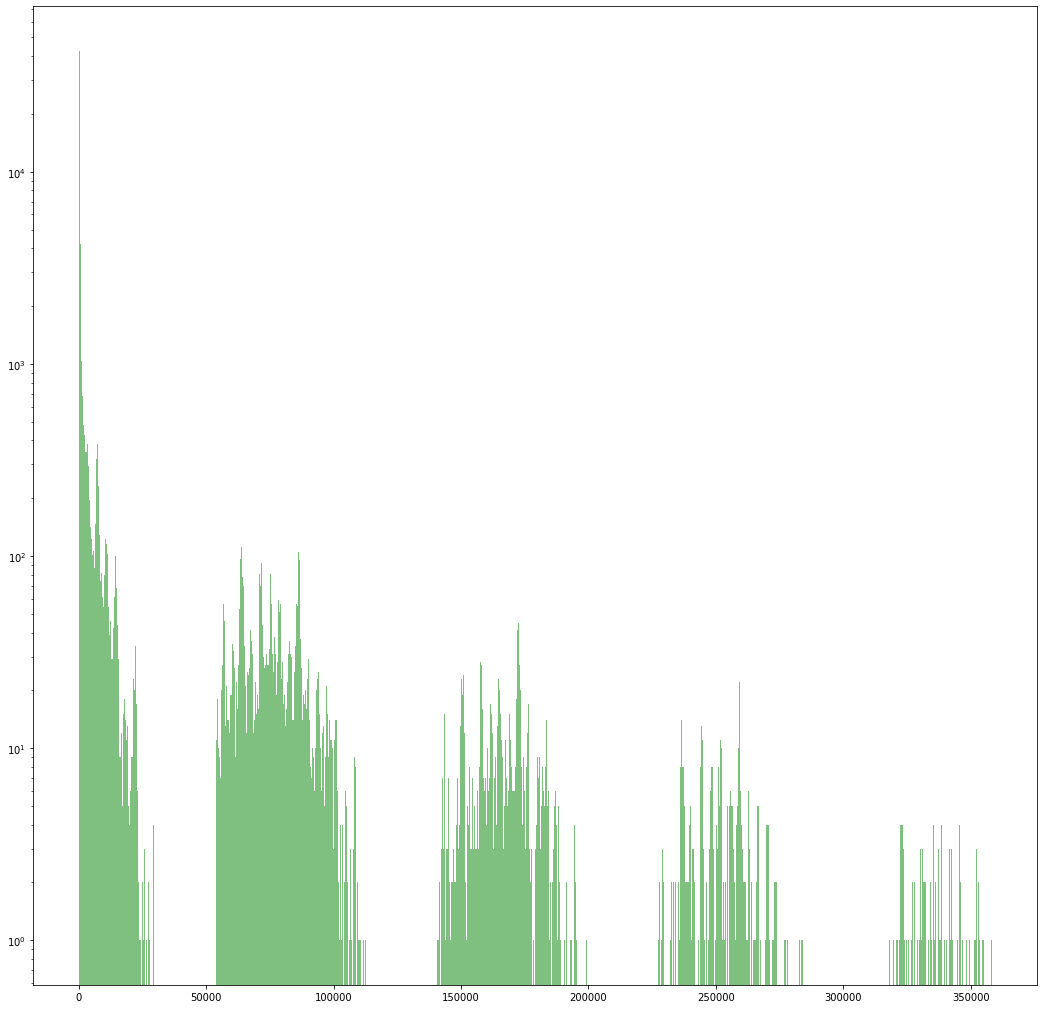

In [35]:
x3 = []

for interactions in pairs_interactions.values(): #interactions is a list of lists of start and end times
    for i in range(1, len(interactions)): #skipping the first interaction
        time = interactions[i][0] - interactions[i - 1][-1]
        if time > 0:
            x3.append(time)

num_bins3 = 1000
figure, axes = plt.subplots(figsize=(18,18)) # set the size that you'd like (width, height)
n, bins, patches = plt.hist(x3, num_bins3, facecolor='green', alpha=0.5, log=True)
plt.show()

^^ Histogram of how many seconds there are between interactions between people are based on the pairs_interactions dictionary